In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results---DONE

# Calculate the date 1 year ago from the last data point in the database---DONE

# Perform a query to retrieve the data and precipitation scores---DONE

# Save the query results as a Pandas DataFrame and set the index to the date column---DONE

# Sort the dataframe by date---DONE

# Use Pandas Plotting with Matplotlib to plot the data---DONE


In [11]:
#Inspect the tables columns and datatypes
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
print('** station **')
for c in columns:
    print(c['name'], c['type'])
print('** measurment **')    
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

** station **
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
** measurment **
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
SQLQRY = engine.execute('select date, prcp from measurement WHERE DATE >= DATE("2017-08-23", "-365 days")\
order by date asc').fetchall()
SQLQRY


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
#  Calculate the date 1 year ago from the last data point in the database
engine.execute('select DATE(max(date), "-365 days") from measurement limit 10').fetchall()

[('2016-08-23',)]

In [14]:
# Create data frame for the resutls of the query
precip_df = pd.DataFrame(SQLQRY, columns = ["Date", "Prcp"])
# Change date feild data to date format
#precipitation_df["Date"] = pd.to_datetime(precipitation_df["Date"], format = '%Y/%m/%d')
# Reset index to the Date column
precip_df.set_index(precip_df['Date'], inplace=True)
precip_df.head()

,Date,Prcp
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,0.02


In [15]:
# Find how many null values in the data frame
precip_df.isnull().sum()

Date      0
Prcp    209
dtype: int64

In [16]:
# There is one null value in precipitation, so replace it with 0, instead of droping it.
precip_df = precip_df.fillna(0)
precip_df.isnull().sum()

Date    0
Prcp    0
dtype: int64

In [18]:
precip_df.head()

,Date,Prcp
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.02


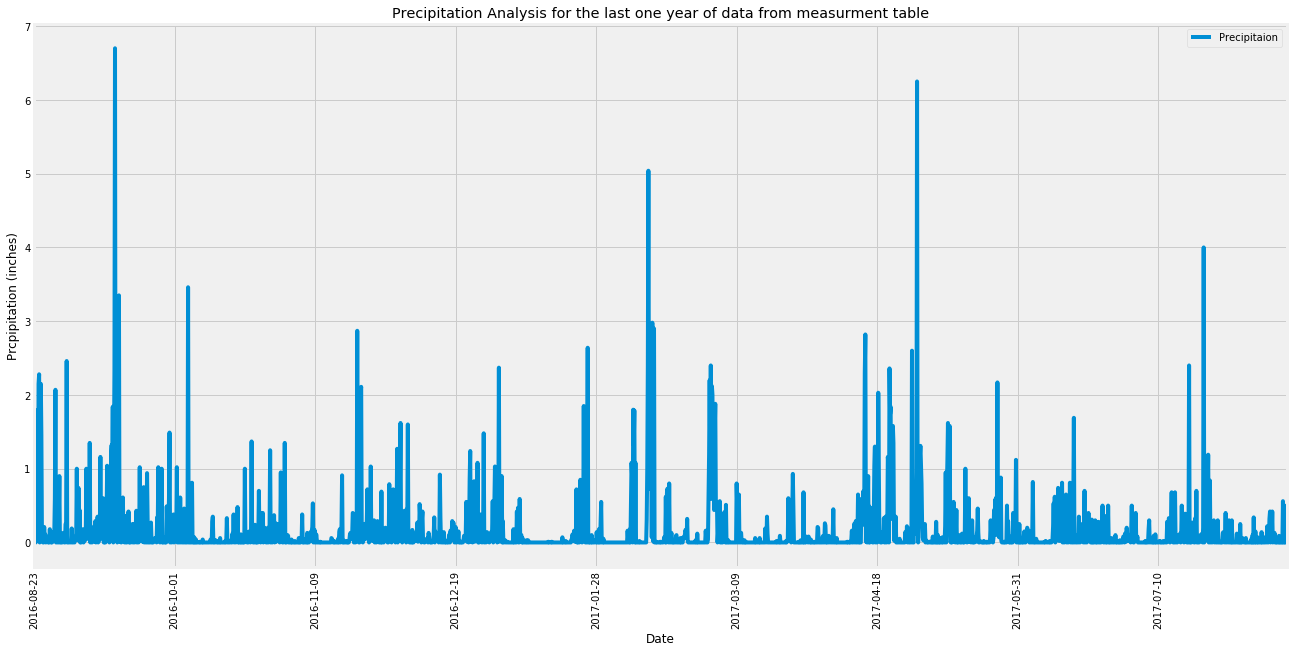

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(20,10))
precip_df.plot("Date","Prcp",figsize=(20,10))
#precipitation_df.plot('Date', 'Prcp', figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Prcpipitation (inches)")
plt.title('Precipitation Analysis for the last one year of data from measurment table')
plt.legend(["Precipitaion"])
plt.xticks(rotation=90)
plt.savefig("Precipitation.png")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute('select count(distinct(station)) from measurement').fetchall()
print(f"There are:  {stations} stations")
stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are:  {stations} stations")

There are:  [(9,)] stations
There are:  9 stations


In [22]:
engine.execute('select station, count(tobs) as tobs from measurement group by station order by tobs desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_station = engine.execute('select station, count(tobs) as tobs from measurement group by \
station order by tobs desc limit 1').fetchall()
print(f"Active Station:  {active_station}")
# List the stations and the counts in descending order.
engine.execute('select station, count(tobs) as tobs from measurement group by station order by tobs desc').fetchall()


Active Station:  [('USC00519281', 2772)]


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?
station_temp = engine.execute('select station, min(tobs), max(tobs), avg(tobs), date from measurement group by \
station order by min(tobs) asc limit 1').fetchall()
print(station_temp)


[('USC00511918', 53.0, 87.0, 71.61596766043456, '2010-09-19')]


In [25]:
engine.execute('select station, max(tobs), date from measurement group by \
station limit 1').fetchall()

[('USC00511918', 87.0, '2010-09-19')]

In [26]:
engine.execute('select * from measurement where tobs = (select max(tobs) from measurement)').fetchall()

[(213, 'USC00519397', '2010-08-23', 0.01, 87.0),
 (2636, 'USC00519397', '2017-05-23', 0.08, 87.0),
 (8991, 'USC00517948', '2017-07-03', None, 87.0),
 (15210, 'USC00511918', '2010-09-19', 0.0, 87.0)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Get last date of the measurment table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
# Get the last 12 month of date from the last_date
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_date)
# Choose the station with the highest number of temperature observations.
highest_temp_obser = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
highest_temp_station = highest_temp_obser[0][0]
highest_temp_value = highest_temp_obser[0][1]
print(highest_temp_station)
print(highest_temp_value)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs). \
filter(Measurement.station == highest_temp_station).filter(Measurement.date >= first_date). \
order_by(Measurement.date).all()

('2017-08-23',)
2016-08-23
USC00519281
2772


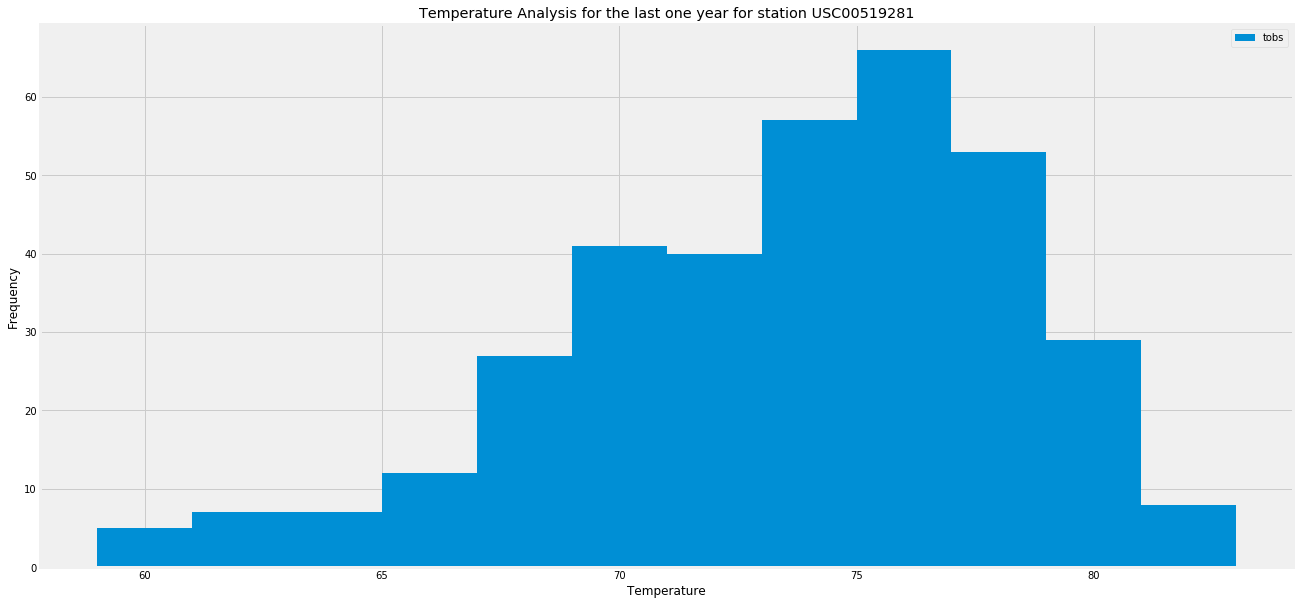

In [28]:
# Create data frame for highest temp station
temp_data_df = pd.DataFrame(temp_data)
temp_data_df.head()
# Observation station temp results histogram plot
plt.figure(figsize=(20,10))
plt.hist(temp_data_df['tobs'], 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title('Temperature Analysis for the last one year for station '+ highest_temp_station)
plt.legend(["tobs"])
plt.savefig("Temperature.png")
plt.show()